In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [ ]:
df_nsclc = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")

In [ ]:
df_nsclc.columns

Calculate the proportion where the patient is NOT dead at the end of trial:

In [ ]:
1-df_nsclc['deadstatus.event'].mean()

Weird values for T:

In [ ]:
df_nsclc[df_nsclc['clinical.T.Stage']>4]

In [ ]:
df_nsclc[df_nsclc['Overall.Stage'].isna()]

Impute this value: overall.stage should be IIIa

In [ ]:
df_nsclc_clean = df_nsclc.copy()

In [ ]:
df_nsclc_clean['Overall.Stage'].fillna('IIIa', inplace=True)

In [ ]:
df_nsclc_clean[df_nsclc_clean['Overall.Stage'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['gender'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['Survival.time'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['age'].isna()]

In [ ]:
df_nsclc_clean = pd.get_dummies(data = df_nsclc_clean, columns=['gender'], drop_first=True)

In [ ]:
df_nsclc_clean.head()

In [ ]:
df_nsclc_clean['gender_male'].mean()

In [ ]:
df_nsclc_clean[df_nsclc_clean['deadstatus.event']==0].describe()

In [ ]:
df_nsclc_clean[df_nsclc_clean['deadstatus.event']==0]['Survival.time'].plot(kind='hist')

In [ ]:
df_nsclc_clean['PatientID'].unique()

In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
# Trying out KM plotter
kmf = KaplanMeierFitter()

kmf.fit(df_nsclc_clean['Survival.time'], df_nsclc_clean['deadstatus.event'])
kmf.plot()

In [ ]:
df_nsclc_clean['Histology'].unique()

In [ ]:
df_surv_lc = df_nsclc_clean[df_nsclc_clean['Histology']=='large cell']
df_surv_sc = df_nsclc_clean[df_nsclc_clean['Histology']=='squamous cell carcinoma']
df_surv_ad = df_nsclc_clean[df_nsclc_clean['Histology']=='adenocarcinoma']
df_surv_nos = df_nsclc_clean[df_nsclc_clean['Histology']=='nos']

In [ ]:
plt.figure(figsize=(10,7))

kmf.fit(df_surv_lc[df_surv_lc['gender_male']==1]['Survival.time'], df_surv_lc[df_surv_lc['gender_male']==1]['deadstatus.event'], label='Male')
ax1 = kmf.plot()

kmf.fit(df_surv_lc[df_surv_lc['gender_male']==0]['Survival.time'], df_surv_lc[df_surv_lc['gender_male']==0]['deadstatus.event'], label='Female')
kmf.plot(ax=ax1)

In [ ]:
plt.figure(figsize=(10,7))

# Stage III
bool_stage3 = df_nsclc_clean['Overall.Stage'].str.contains('III')
print(df_nsclc_clean[bool_stage3].shape)
# Stage I
bool_stage1 = df_nsclc_clean['Overall.Stage']=='I'
print(df_nsclc_clean[bool_stage1].shape)

kmf.fit(df_nsclc_clean[bool_stage3]['Survival.time'], df_nsclc_clean[bool_stage3]['deadstatus.event'], label='Stage III')
ax1 = kmf.plot()

kmf.fit(df_nsclc_clean[bool_stage1]['Survival.time'], df_nsclc_clean[bool_stage1]['deadstatus.event'], label='Stage I')
kmf.plot(ax=ax1)

---

In [ ]:
os.chdir('/Users/herve/Documents/BrainStation Data Science/Capstone')
df_features_test = pd.read_csv('Table.csv', index_col = 0)

In [ ]:
df_features_test.head()

In [ ]:
df_features_test['Feature Class'].unique()

We probably only need 'shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', and 'ngtdm'

In [ ]:
needed_features = ['shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', 'ngtdm']

In [ ]:
gtv_columns = df_features_test.columns[df_features_test.columns.str.contains('gtv', case=False)]
df_features_col = ['Feature Class', 'Feature Name']
df_features_col.extend(gtv_columns)

df_features_col

In [ ]:
df_feat_test_short = df_features_test[df_features_col]

In [ ]:
mask_feat = df_feat_test_short['Feature Class'].isin(needed_features)
features = df_feat_test_short[mask_feat]['Feature Class'].unique()

In [ ]:
df_feat_short = df_feat_test_short[df_feat_test_short['Feature Class'].isin(needed_features)]

In [ ]:
df_trans = df_feat_short.transpose()
display(df_trans)

In [ ]:
# Add a column called structure (GTV name)
# Then add a column called patient
df_trans = df_trans.rename(index={'Feature Name': 'Structure Name'})
df_trans.drop(index='Feature Class', inplace=True)
display(df_trans)
df_trans.index

In [ ]:
df_trans.columns = df_trans.iloc[0, 0:]

In [ ]:
df_trans.drop('Structure Name', axis=0, inplace=True)
display(df_trans)

In [ ]:
# Define what PatientID first before running the code!
PatientID = 'TEST'
fill_pxcol = [PatientID]*len(gtv_columns)
df_trans.insert(loc = 0, column='Patient ID', value=fill_pxcol)

In [ ]:
display(df_trans)

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [ ]:
root='/Volumes/Time Machine Backups/Radiomics-NSCLC-v3-analysis'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

In [ ]:
# Then run a loop
os.chdir(root)
print(f'Current directory: {os.getcwd()}')

df_nsclc = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")

df_list = []
# Needed features for analysis
needed_features = ['shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', 'ngtdm']

max_num_GTVs = 0

for dirname in dirlist:
    # Reading the CSV file in a specific folder
    folder_name = dirname + '/Table.csv'
    df_features_test = pd.read_csv( folder_name, index_col = 0 )
    
    # Only selecting results from the GTVs (i.e. excluding OARs)
    gtv_columns = df_features_test.columns[df_features_test.columns.str.contains('gtv', case=False)]
    
    # And include the feature names too
    df_features_col = ['Feature Class', 'Feature Name']
    df_features_col.extend(gtv_columns)
    df_feat_test_short = df_features_test[df_features_col]

    # Only include the feature classes that are useful
    # (i.e. winnowing out version information, position, etc.)
    df_feat_short = df_feat_test_short[df_feat_test_short['Feature Class'].isin(needed_features)]
    
    # Merge Feature Class and Feature Name
    df_feat_short['Merged Feature Name'] = df_feat_short['Feature Class'] + '_' + df_feat_short['Feature Name']
    
    # Switch the order of the columns
    cols = df_feat_short.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_feat_short = df_feat_short[cols]

    # Switching the rwos and columns for easier task of appending
    df_trans = df_feat_short.transpose()
    df_trans.columns = df_trans.iloc[0, 0:] # Changing the column names to the feature names
    df_trans.drop(index=['Feature Class', 'Feature Name', 'Merged Feature Name'], inplace=True)
    
    # Store the maximum number of GTVs out of all patients (for zero padding later on)
    if (df_trans.shape[0] > max_num_GTVs) :
        max_num_GTVs = df_trans.shape[0]
    
    # Store as a list of dataframes
    df_list.append(df_trans)

In [ ]:
df_trans.head()

In [ ]:
max_num_GTVs

In [ ]:
df_list_padded = []

for df in df_list:
    columns = df.columns
    df_temp_list = []
    
    for i in range(max_num_GTVs):
        if (i < df.shape[0]):
            series = df.iloc[i]
            df_temp = pd.DataFrame(series.values.astype(float), index = columns + '_' + str(i))
            df_temp_list.append(df_temp.transpose())
        else:
            series = np.zeros(len(columns))
            df_temp = pd.DataFrame(series, index = columns + '_' + str(i))
            df_temp_list.append(df_temp.transpose())
            
    df_list_padded.append( pd.concat(df_temp_list, axis=1) )

In [ ]:
# And concat
df_grand = pd.concat(df_list_padded, keys=dirlist)

display(df_grand)

In [ ]:
df_grand.reset_index(inplace=True)

df_grand.drop(columns='level_1', inplace=True)

df_grand.rename(columns = {'level_0': 'PatientID'},
                inplace = True)

In [ ]:
df_grand.set_index('PatientID', inplace=True)

In [ ]:
df_grand.head(10)

In [ ]:
features = df_grand.columns

In [ ]:
df_grand = df_grand.join(df_nsclc.set_index('PatientID'), on='PatientID', how='inner')

In [ ]:
df_grand['clinical.T.Stage'] = df_grand['clinical.T.Stage'].astype(int)

In [ ]:
df_grand[df_grand['Overall.Stage'].isna()]

In [ ]:
df_grand['Overall.Stage'] = df_grand['Overall.Stage'].fillna(value='IIIa')

---

Thoughts:
- can run logistic regression based on survival past 1 year, survival past 2 years, etc.
- associate features with histology? $\rightarrow$ may not be clinically significant; management for various histological diseases is similar
- associate features with staging?
- k-means clustering to see if there are subtypes in the dataset?

Nomenclature:
- _ln: patients with survival time less than n years
- _gn: patients with survival time greater than n years

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from scipy.stats import kstest, boxcox
from statsmodels.graphics.gofplots import qqplot

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_grand = pd.read_csv('~/Desktop/NSCLC-Radiomics-padded.csv')

In [3]:
dead = df_grand['deadstatus.event'].astype(bool)

mask_1yr = (df_grand['Survival.time'] >= 365)
mask_3yr = (df_grand['Survival.time'] >= 3*365)
mask_5yr = (df_grand['Survival.time'] >= 5*365)

Excluding censored patients for the 1-year analysis:

In [4]:
features = df_grand.columns[df_grand.columns.str.contains('_')]

In [6]:
X1 = df_grand[mask_1yr | dead][features]
y1 = df_grand[mask_1yr | dead]['deadstatus.event']

X1 = X1.astype(float)

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

For EDA: just look at the features for the first tumour (those containing _0):

In [8]:
corr = X1_train[ features[features.str.contains('_0')] ].corr()

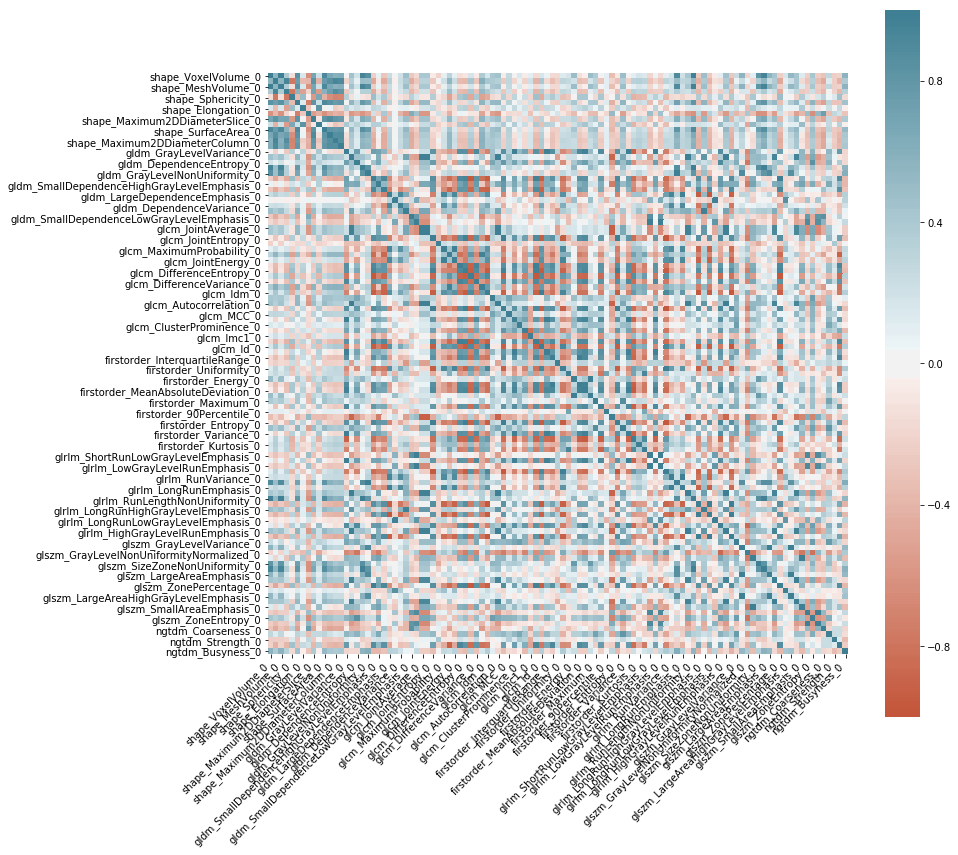

In [9]:
plt.figure(figsize=(13,13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [37]:
df_tf = df_grand.copy()

In [38]:
for i in range(1):
    str_i = str(i)
    
    # Shape
    df_tf.drop(columns=['shape_VoxelVolume_'+str_i, 
                        'shape_Maximum2DDiameterColumn_'+str_i, 
                        'shape_Maximum2DDiameterRow_'+str_i], inplace=True)
    
    df_tf['log_shape_MeshVolume_'+str_i] = np.log( df_tf['shape_MeshVolume_'+str_i] )
    df_tf.drop(columns=['shape_MeshVolume_' + str_i])
    
    # GLDM
    df_tf.drop(columns=['gldm_LargeDependenceEmphasis_'+str_i], 
               inplace = True)
    
    df_tf['log_gldm_GrayLevelVariance_' + str_i] = np.log(df_tf['gldm_GrayLevelVariance_' + str_i])
    df_tf['log_gldm_DependenceNonUniformity_' + str_i] = np.log(df_tf['gldm_DependenceNonUniformity_' + str_i])
    df_tf['log_gldm_GrayLevelNonUniformity_' + str_i] = np.log(df_tf['gldm_GrayLevelNonUniformity_' + str_i])
    df_tf['bc_gldm_LargeDependenceLowGrayLevelEmphasis_' 
          + str_i] = boxcox(df_tf['gldm_LargeDependenceLowGrayLevelEmphasis_' + str_i])[0]
    df_tf['bc_gldm_SmallDependenceLowGrayLevelEmphasis_' 
          + str_i] = boxcox(df_tf['gldm_SmallDependenceLowGrayLevelEmphasis_' + str_i])[0]
    df_tf['bc_gldm_LowGrayLevelEmphasis_' + str_i] = boxcox(df_tf['gldm_LowGrayLevelEmphasis_' + str_i])[0]
    
    df_tf.drop(columns=['gldm_GrayLevelVariance_' + str_i,
                        'gldm_DependenceNonUniformity_' + str_i,
                        'gldm_GrayLevelNonUniformity_' + str_i,
                        'gldm_LargeDependenceLowGrayLevelEmphasis_' + str_i,
                        'gldm_SmallDependenceLowGrayLevelEmphasis_' + str_i,
                        'gldm_LowGrayLevelEmphasis_' + str_i], inplace=True)
    
    # GLCM
    df_tf.drop(columns=['glcm_SumAverage_' + str_i, 
                        'glcm_JointAverage_' + str_i,
                        'glcm_SumEntropy_' + str_i,
                        'glcm_DifferenceEntropy_' + str_i,
                        'glcm_Id_' + str_i,
                        'glcm_Idn_' + str_i,
                        'glcm_ClusterTendency_' + str_i,
                        'glcm_Contrast_' + str_i], inplace=True)
    df_tf['bc_glcm_JointEnergy_' + str_i] = boxcox(df_tf['glcm_JointEnergy_' + str_i])[0]
    df_tf['log_glcm_DifferenceVariance_' + str_i] = np.log(df_tf['glcm_DifferenceVariance_' + str_i])
    df_tf['log_glcm_SumSquares_' + str_i] = np.log(df_tf['glcm_SumSquares_' + str_i])
    df_tf['bc_glcm_ClusterProminence_' + str_i] = boxcox(df_tf['glcm_ClusterProminence_' + str_i])[0]
    df_tf['bc_glcm_DifferenceAverage_' + str_i] = boxcox(df_tf['glcm_DifferenceAverage_' + str_i])[0]
    
    df_tf.drop(columns=['glcm_JointEnergy_' + str_i,
                        'glcm_DifferenceVariance_' + str_i,
                        'glcm_SumSquares_' + str_i,
                        'glcm_ClusterProminence_' + str_i,
                        'glcm_DifferenceAverage_' + str_i], inplace=True)
    
    # First order
    df_tf.drop(columns=['firstorder_RobustMeanAbsoluteDeviation_' + str_i, 
                        'firstorder_MeanAbsoluteDeviation_' + str_i,
                        'firstorder_TotalEnergy_' + str_i], inplace=True)
    df_tf['bc_firstorder_InterquartileRange_' + str_i] = boxcox(df_tf['firstorder_InterquartileRange_' + str_i])[0]
    df_tf['log_firstorder_Energy_' + str_i] = np.log(df_tf['firstorder_Energy_' + str_i])
    df_tf['log_firstorder_Kurtosis_' + str_i] = np.log(df_tf['firstorder_Kurtosis_' + str_i])
    df_tf['log_firstorder_RootMeanSquared_' + str_i] = np.log(df_tf['firstorder_RootMeanSquared_' + str_i])
    
    # GLRLM
    df_tf.drop(columns=['glrlm_ShortRunLowGrayLevelEmphasis_' + str_i,
                        'glrlm_LowGrayLevelRunEmphasis_' + str_i,
                        'glrlm_LongRunEmphasis_' + str_i,
                        'glrlm_RunLengthNonUniformityNormalized_' + str_i,
                        'glrlm_ShortRunEmphasis_' + str_i], inplace=True)
    df_tf['log_glrlm_GrayLevelVariance_' + str_i] = np.log(df_tf['glrlm_GrayLevelVariance_' + str_i])
    df_tf['log_glrlm_RunVariance_' + str_i] = np.log(df_tf['glrlm_RunVariance_' + str_i])
    df_tf['log_glrlm_GrayLevelNonUniformity_' + str_i] = np.log(df_tf['glrlm_GrayLevelNonUniformity_' + str_i])
    df_tf['log_glrlm_RunLengthNonUniformity_' + str_i] = np.log(df_tf['glrlm_RunLengthNonUniformity_' + str_i])
    df_tf['bc_glrlm_LongRunLowGrayLevelEmphasis_' + str_i] = boxcox(df_tf['glrlm_LongRunLowGrayLevelEmphasis_' 
                                                                          + str_i])[0]
    
    df_tf.drop(columns=['glrlm_GrayLevelVariance_' + str_i,
                        'glrlm_RunVariance_' + str_i,
                        'glrlm_GrayLevelNonUniformity_' + str_i,
                        'glrlm_RunLengthNonUniformity_' + str_i,
                        'glrlm_LongRunLowGrayLevelEmphasis_' + str_i], inplace = True)
    
    # GLSZM
    df_tf.drop(columns=['glszm_LargeAreaEmphasis_' + str_i,
                        'glszm_LargeAreaHighGrayLevelEmphasis_' + str_i,
                        'glszm_SmallAreaEmphasis_' + str_i,
                        'glszm_SmallAreaHighGrayLevelEmphasis_' + str_i,
                        'glszm_SmallAreaLowGrayLevelEmphasis_' + str_i], inplace=True)
    df_tf['log_glszm_GrayLevelVariance_' + str_i] = boxcox(df_tf['glszm_GrayLevelVariance_' + str_i])[0]
    df_tf['bc_glszm_ZoneVariance_' + str_i] = boxcox(df_tf['glszm_ZoneVariance_' + str_i])[0]
    df_tf['log_glszm_GrayLevelNonUniformityNormalized_' + str_i] = np.log(df_tf['glszm_GrayLevelNonUniformityNormalized_' 
                                                                                + str_i])
    df_tf['log_glszm_SizeZoneNonUniformity_' + str_i] = np.log(df_tf['glszm_SizeZoneNonUniformity_' + str_i])
    df_tf['log_glszm_GrayLevelNonUniformity_' + str_i] = np.log(df_tf['glszm_GrayLevelNonUniformity_' + str_i])
    df_tf['log_glszm_ZonePercentage_' + str_i] = np.log(df_tf['glszm_ZonePercentage_' + str_i])
    df_tf['log_glszm_LargeAreaLowGrayLevelEmphasis_' + str_i] = np.log(df_tf['glszm_LargeAreaLowGrayLevelEmphasis_' 
                                                                             + str_i])
    df_tf['bc_glszm_LowGrayLevelZoneEmphasis_' + str_i] = boxcox(df_grand['glszm_LowGrayLevelZoneEmphasis_' + str_i])[0]
    
    df_tf.drop(columns=['glszm_GrayLevelVariance_' + str_i,
                        'glszm_ZoneVariance_' + str_i,
                        'glszm_GrayLevelNonUniformityNormalized_' + str_i,
                        'glszm_SizeZoneNonUniformity_' + str_i,
                        'glszm_GrayLevelNonUniformity_' + str_i,
                        'glszm_ZonePercentage_' + str_i,
                        'glszm_LargeAreaLowGrayLevelEmphasis_' + str_i,
                        'glszm_LowGrayLevelZoneEmphasis_' + str_i], inplace=True)

In [39]:
feat0 = df_tf.columns.str.contains('_0')
display(df_tf.columns[feat0])

Index(['shape_Maximum3DDiameter_0', 'shape_MeshVolume_0',
       'shape_MajorAxisLength_0', 'shape_Sphericity_0',
       'shape_LeastAxisLength_0', 'shape_Elongation_0',
       'shape_SurfaceVolumeRatio_0', 'shape_Maximum2DDiameterSlice_0',
       'shape_Flatness_0', 'shape_SurfaceArea_0', 'shape_MinorAxisLength_0',
       'gldm_HighGrayLevelEmphasis_0', 'gldm_DependenceEntropy_0',
       'gldm_SmallDependenceEmphasis_0',
       'gldm_SmallDependenceHighGrayLevelEmphasis_0',
       'gldm_DependenceNonUniformityNormalized_0', 'gldm_DependenceVariance_0',
       'gldm_LargeDependenceHighGrayLevelEmphasis_0', 'glcm_JointEntropy_0',
       'glcm_ClusterShade_0', 'glcm_MaximumProbability_0', 'glcm_Idmn_0',
       'glcm_InverseVariance_0', 'glcm_Idm_0', 'glcm_Correlation_0',
       'glcm_Autocorrelation_0', 'glcm_MCC_0', 'glcm_Imc2_0', 'glcm_Imc1_0',
       'firstorder_InterquartileRange_0', 'firstorder_Skewness_0',
       'firstorder_Uniformity_0', 'firstorder_Median_0', 'firstorder_Energy_

In [40]:
X1 = df_tf[mask_1yr | dead][df_tf.columns[feat0]]
y1 = df_tf[mask_1yr | dead]['deadstatus.event']

In [42]:
X1 = X1.astype(float)

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [46]:
my_scaler = StandardScaler()
X1_train = my_scaler.fit_transform(X1_train)
X1_test = my_scaler.transform(X1_test)

my_logit = LogisticRegression()
my_logit.fit(X1_train, y1_train)
my_logit.score(X1_train, y1_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8938356164383562

In [47]:
my_logit.score(X1_test, y1_test)

0.8968253968253969

In [57]:
my_dt = DecisionTreeClassifier(max_depth=5)
my_dt.fit(X1_train, y1_train)
my_dt.score(X1_train, y1_train)

0.9075342465753424

In [58]:
my_dt.score(X1_test, y1_test)

0.8809523809523809